In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob

from RaTag.alphas.energy_map_reader import load_energy_index
from RaTag.pipelines.xray_only import xray_pipeline
from RaTag.core.datatypes import Run
from RaTag.workflows.run_construction import initialize_run

%matplotlib inline

In [50]:
from RaTag.core.uid_utils import decode_uid
from RaTag.core.dataIO import load_wfm, extract_single_frame
from RaTag.plotting import plot_waveform, _plot_window_shading
from RaTag.core.fitting import fit_gaussian_to_histogram, plot_gaussian_fit

In [3]:
path_run = Path('/Volumes/KINGSTON/RaTag_data/RUN18b')
run = Run(
    run_id="RUN18b",
    root_directory=path_run,
    target_isotope="Th228",
    pressure=2.0,
    temperature=297.0,
    sampling_rate=5.0,
    drift_gap=1.4,
    el_gap=0.8,
    el_field=2375.0,
    sets=[]
)
run = initialize_run(run)


RUN INITIALIZATION

[1/3] Gas density...
  ✓ Gas density: 4.877e+19 cm⁻³

[2/3] Populating sets...
Detected multi-isotope files...
  Loaded: FieldScan_Th228_Gate0075_Anode1975 - 10000 files (480000 waveforms) [FastFrame (48 frames/file)]
  ✓ Loaded 1 sets

[3/3] Computing fields and transport properties...
  ✓ FieldScan_Th228_Gate0075_Anode1975: Computed and saved to cache

✓ Run initialization complete


# Run xray-only pipeline

In [10]:
xray_results = xray_pipeline(run)


X-RAY CLASSIFICATION PIPELINE: RUN18

X-RAY CLASSIFICATION

Set 1/3: FieldScan_Gate0050_Anode1950
  📂 Loaded from cache (n_accepted=433, data file exists)

Set 2/3: FieldScan_Gate0100_Anode2000
  📂 Loaded from cache (n_accepted=350, data file exists)

Set 3/3: FieldScan_Gate0200_Anode2100
  📂 Loaded from cache (n_accepted=394, data file exists)

X-RAY CLASSIFICATION VALIDATION

Set 1/3: FieldScan_Gate0050_Anode1950
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate0050_Anode1950_xray_validation.png
  ✓ Plotted 5 accepted, 5 rejected

Set 2/3: FieldScan_Gate0100_Anode2000
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate0100_Anode2000_xray_validation.png
  ✓ Plotted 5 accepted, 5 rejected

Set 3/3: FieldScan_Gate0200_Anode2100
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate02

In [ ]:
from RaTag.workflows.xray_integration import validate_xray_classification

# Validate classification - visualize accepted vs rejected events
# The min_xray_area filter is now applied during classification (see XRayConfig)
xray_results = validate_xray_classification(xray_results, n_waveforms=5)


X-RAY CLASSIFICATION VALIDATION
Filtering accepted events: area >= 0.100 mV·µs

Set 1/3: FieldScan_Gate0050_Anode1950
  Filtered to 32 events with area >= 0.100 mV·µs
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate0050_Anode1950_xray_validation.png
  ✓ Plotted 5 accepted, 5 rejected

Set 2/3: FieldScan_Gate0100_Anode2000
  Filtered to 7 events with area >= 0.100 mV·µs
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate0050_Anode1950_xray_validation.png
  ✓ Plotted 5 accepted, 5 rejected

Set 2/3: FieldScan_Gate0100_Anode2000
  Filtered to 7 events with area >= 0.100 mV·µs
  → Saved: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/plots/all/xray_validation/FieldScan_Gate0100_Anode2000_xray_validation.png
  ✓ Plotted 5 accepted, 5 rejected

Set 3/3: FieldScan_Gate0200_Anode2100
  Filtered to 5 events with area >= 0.100 mV·µs
 

# Validate X-ray Classification run 18b

Visualize accepted vs rejected X-ray events. 

**Note:** Quality filters (min_xray_area, max_area_s1, max_area_s2) are now applied during classification in the pipeline. To change these thresholds, modify the `XRayConfig` parameters before running the classification workflow.

In [96]:
path_75 = Path('/Volumes/KINGSTON/RaTag_data/RUN18b/processed_data/all/FieldScan_Th228_Gate0075_Anode1975_xray_areas.npz')

xray_data = np.load(path_75, allow_pickle=True)
# xray_data['xray_areas']

[Text(0.5, 0, 'X-ray area [V·us]'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'X-ray area distribution for RUN18b - 1975V Anode, 75V Gate')]

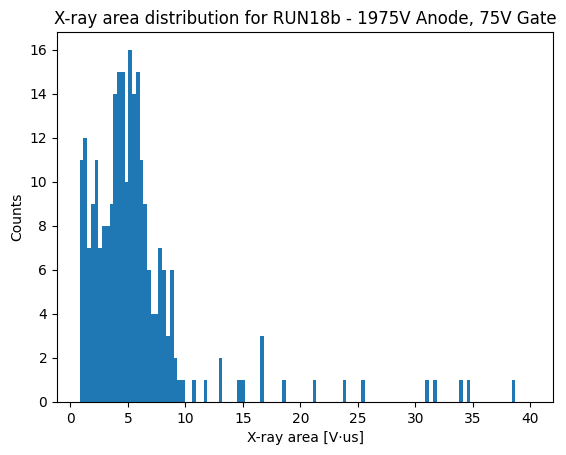

In [97]:
n, bins, patches = plt.hist(xray_data['xray_areas'], bins=120, range=(0.8, 40))
plt.gca().set(xlabel='X-ray area [V·us]', ylabel='Counts', title='X-ray area distribution for RUN18b - 1975V Anode, 75V Gate')

In [98]:
areas = xray_data['xray_areas']
uids = xray_data['uids']
long_uids = uids[areas > 0.8]
long_areas = areas[areas > 0.8]
len(long_uids)

263

In [99]:

uids0 = xray_data['uids'][32]
for uid in long_uids[:6]:
    index, frame = decode_uid(uid)
    print(f"UID: {uid}, Index: {index}, Frame: {frame}")

UID: 64324, Index: 1005, Frame: 4
UID: 65123, Index: 1017, Frame: 35
UID: 69592, Index: 1087, Frame: 24
UID: 73871, Index: 1154, Frame: 15
UID: 76864, Index: 1201, Frame: 0
UID: 77258, Index: 1207, Frame: 10


In [100]:
tdict = {
    "t_s1": -3.379,
    "t_s1_std": 1.549,
    "t_s2_start": 14.094,
    "t_s2_start_std": 1.137,
    "t_s2_end": 19.127,
    "t_s2_end_std": 3.058
}

UID: 64324, Index: 1005, Frame: 4, Area: 0.884 V·us


/var/folders/tb/zxwsw51n6_g6gs5lnxdv2bcr0000gn/T/ipykernel_36402/4045828548.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


UID: 65123, Index: 1017, Frame: 35, Area: 8.771 V·us
UID: 69592, Index: 1087, Frame: 24, Area: 15.035 V·us
UID: 73871, Index: 1154, Frame: 15, Area: 3.063 V·us
UID: 76864, Index: 1201, Frame: 0, Area: 4.520 V·us
UID: 77258, Index: 1207, Frame: 10, Area: 0.898 V·us
UID: 79120, Index: 1236, Frame: 16, Area: 2.464 V·us
UID: 80073, Index: 1251, Frame: 9, Area: 1.203 V·us
UID: 84489, Index: 1320, Frame: 9, Area: 6.269 V·us
UID: 87691, Index: 1370, Frame: 11, Area: 5.249 V·us


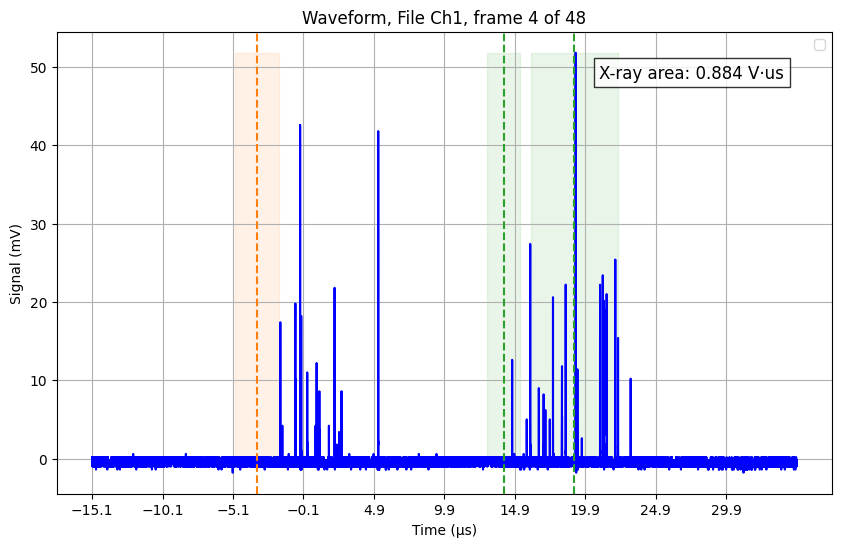

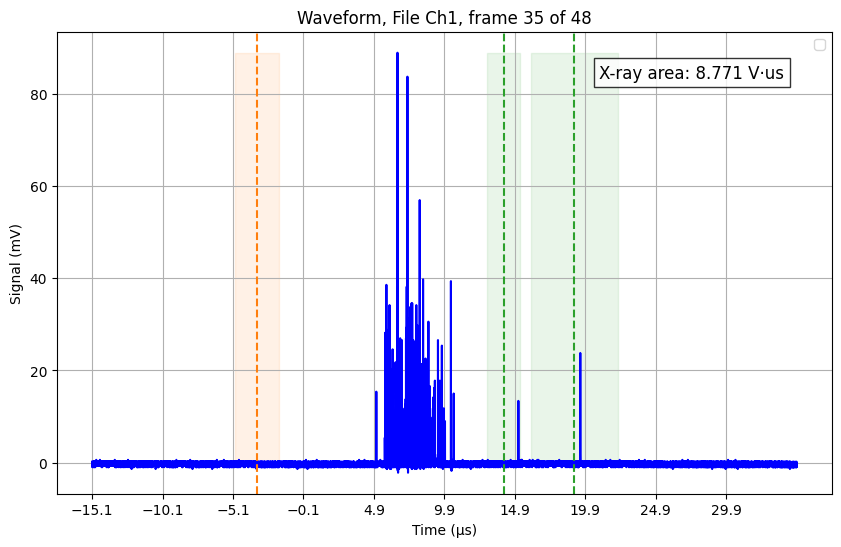

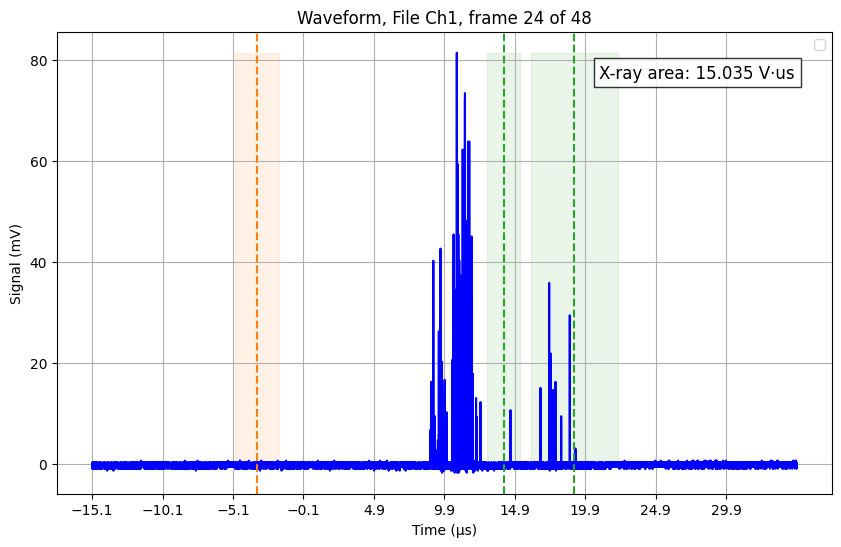

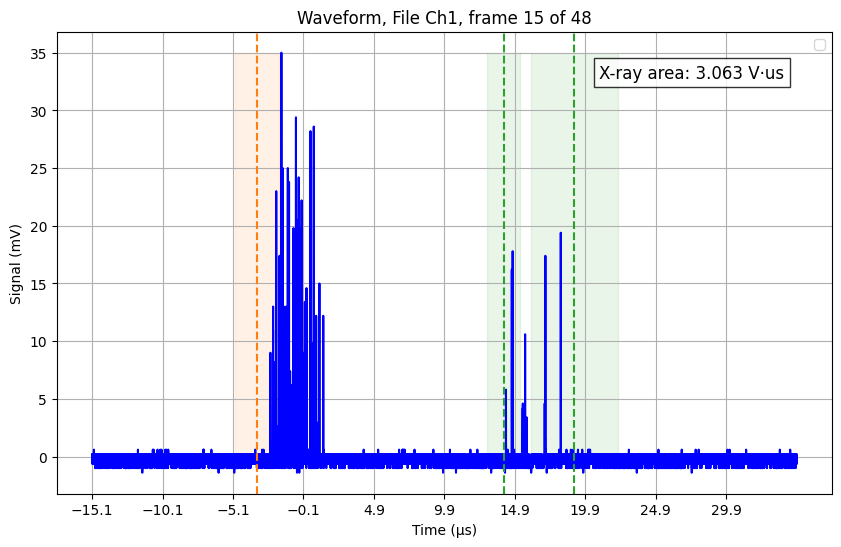

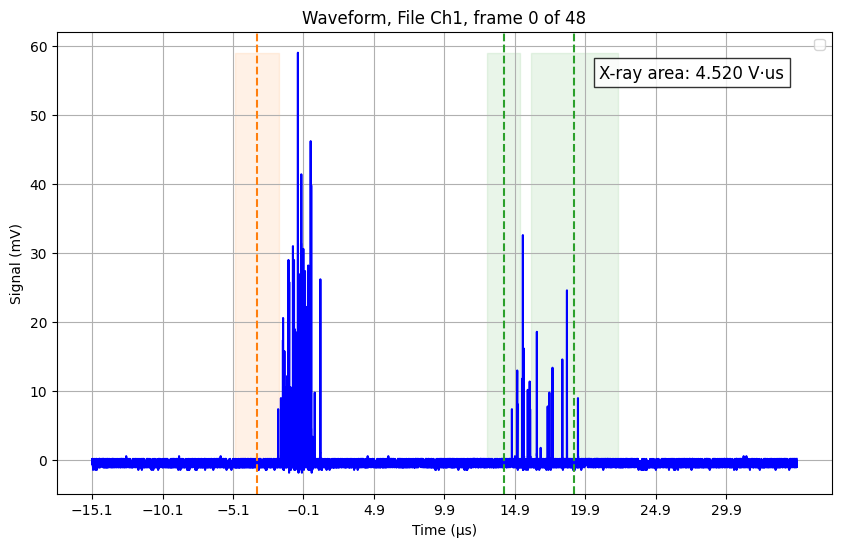

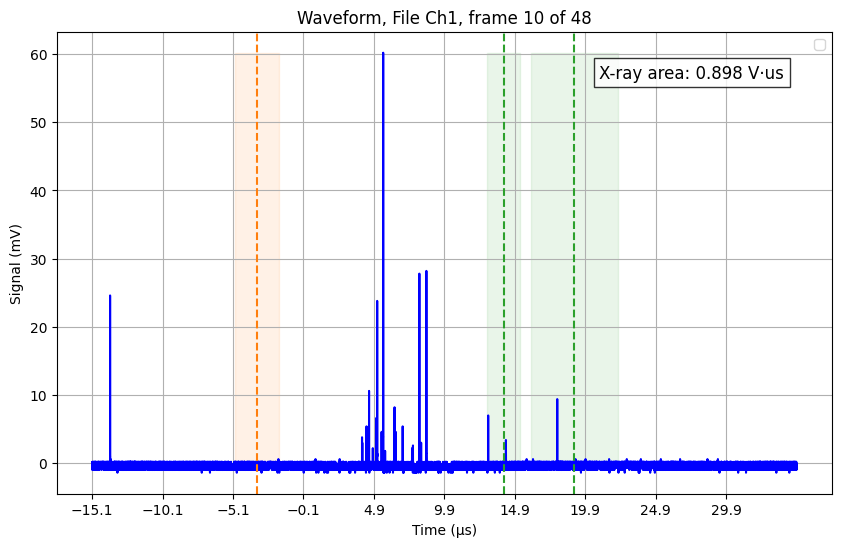

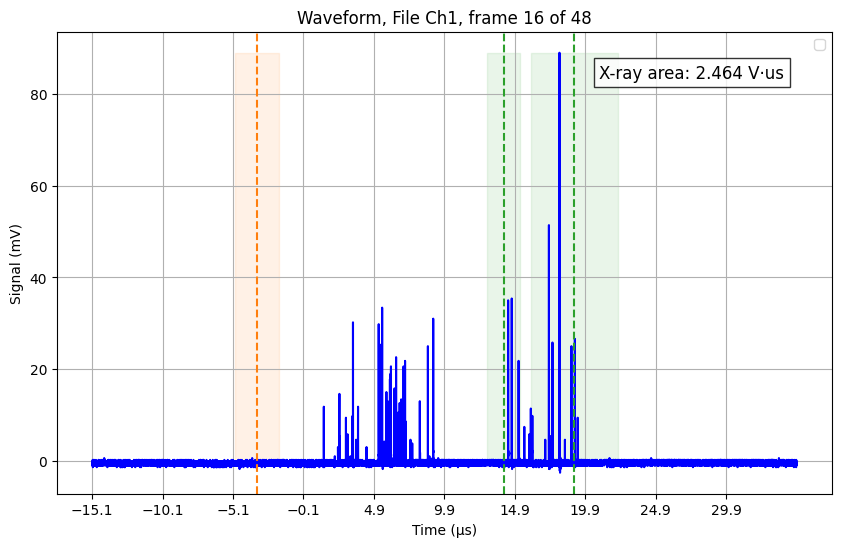

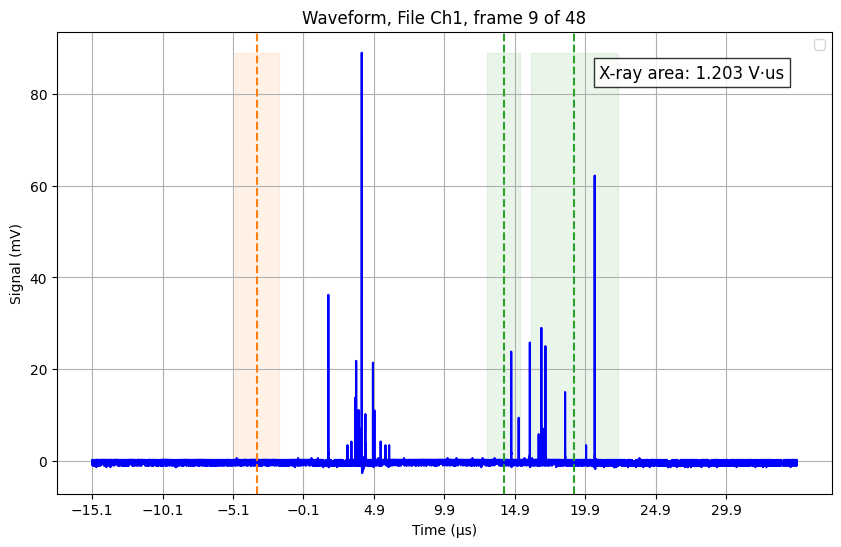

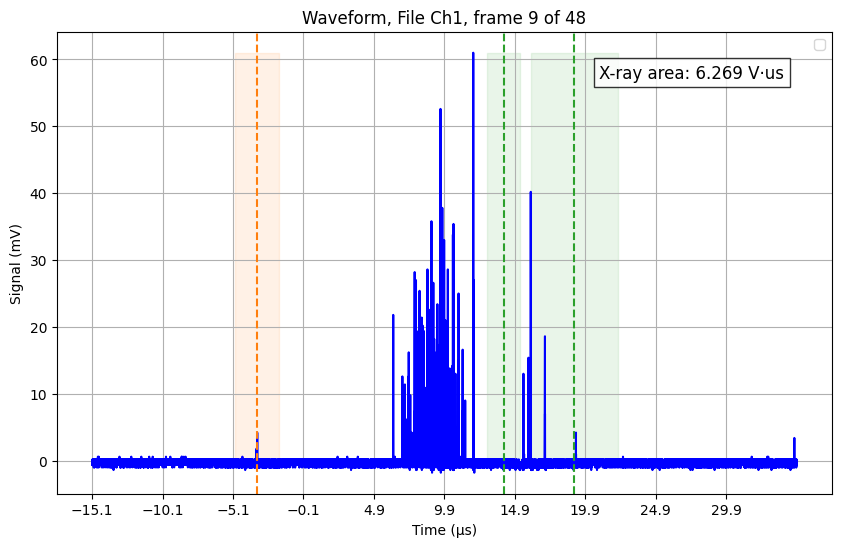

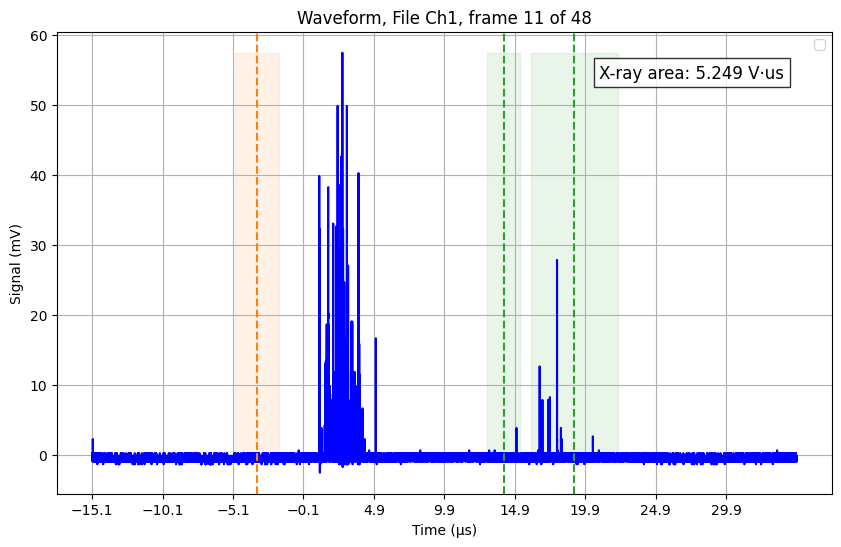

In [101]:
base_path = '/Volumes/KINGSTON/RaTag_data/RUN18b/FieldScan_Th228_Gate0075_Anode1975/RUN18_20251109_Gate0075_Anode1975_P13_'
max_frames = 10
for uid, area in zip(long_uids[:max_frames], long_areas[:max_frames]):
    index, frame = decode_uid(uid)
    print(f"UID: {uid}, Index: {index}, Frame: {frame}, Area: {area:.3f} V·us")
    wfm_path = base_path + f'{index}Wfm_Ch1.wfm'
    wfm = load_wfm(wfm_path)
    ax, ymax = plot_waveform(wfm, frame=frame)
    ax.text(0.7, 0.9, f'X-ray area: {area:.3f} V·us', transform=ax.transAxes, fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
    ax.legend()
    _plot_window_shading(ax, tdict, key='t_s1', y_max=ymax, color='C1')
    _plot_window_shading(ax, tdict, key='t_s2_start', y_max=ymax, color='C2')
    _plot_window_shading(ax, tdict, key='t_s2_end', y_max=ymax, color='C2')

[Text(0.5, 1.0, 'Alpha waveform - RUN18 - 1950V Anode, 50V Gate')]

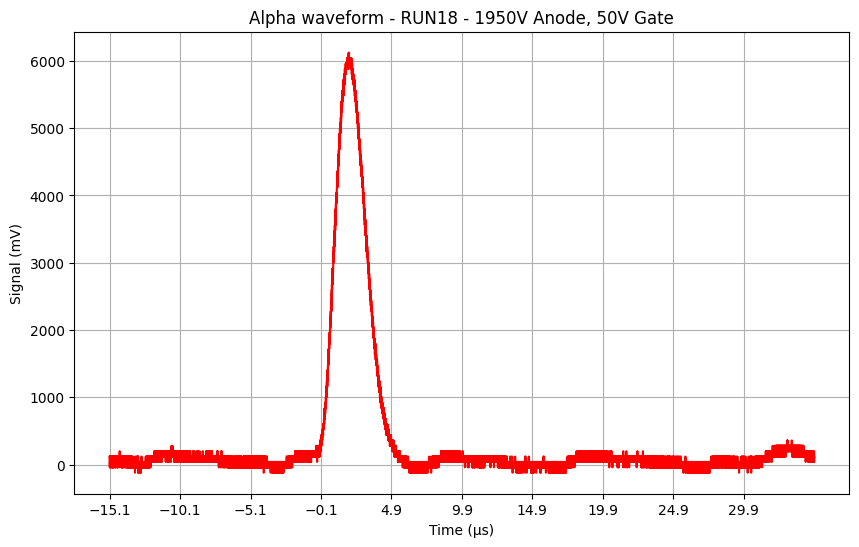

In [88]:
path_alpha = '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN18_multi/FieldScan_Gate0050_Anode1950/RUN18_20251104_Gate50_Anode1950_P1_1Wfm_Ch4.wfm'
wfm_alpha = load_wfm(path_alpha)
wfm_alpha.v = - wfm_alpha.v  # Invert signal
frame_alpha = 0
ax, ymax = plot_waveform(wfm_alpha, frame=frame_alpha, color='r')
ax.set(title='Alpha waveform - RUN18 - 1950V Anode, 50V Gate')
# _plot_window_shading(ax, tdict, key='t_s1', y_max=ymax, color='C1')
# _plot_window_shading(ax, tdict, key='t_s2_start', y_max=ymax, color='C2')
# _plot_window_shading(ax, tdict, key='t_s2_end', y_max=ymax, color='C2')

# Validate X-Rays run 18

In [74]:
path_18 = Path('/Volumes/KINGSTON/RaTag_data/RUN18/processed_data/RUN18_xray_areas_combined.npz')

xray_data_18 = np.load(path_18, allow_pickle=True)
# xray_data['xray_areas']

[Text(0.5, 0, 'X-ray area [V·us]'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'X-ray area distribution for RUN18b - 1975V Anode, 75V Gate')]

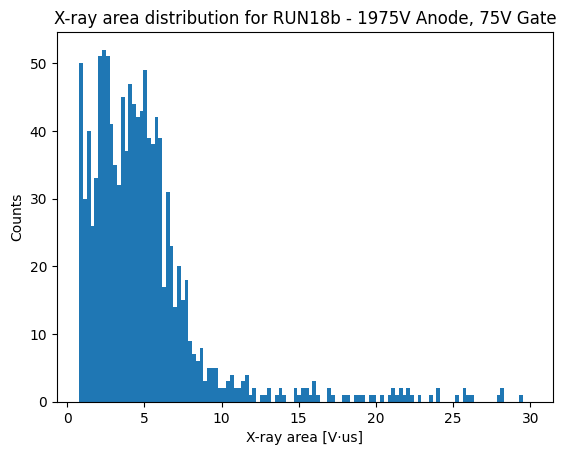

In [77]:
n, bins, patches = plt.hist(xray_data_18['xray_areas'], bins=120, range=(0.8, 30))
plt.gca().set(xlabel='X-ray area [V·us]', ylabel='Counts', title='X-ray area distribution for RUN18b - 1975V Anode, 75V Gate')

# Trigger 2 tests:

In [86]:
pathtrigger_2 = '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN20/processed_data/RUN18_xray_areas_combined.npz'
xray_data_2 = np.load(pathtrigger_2, allow_pickle=True)

[Text(0.5, 0, 'X-ray area [V·us]'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'X-ray area distribution for RUN20 - 2000V Anode, 100V Gate')]

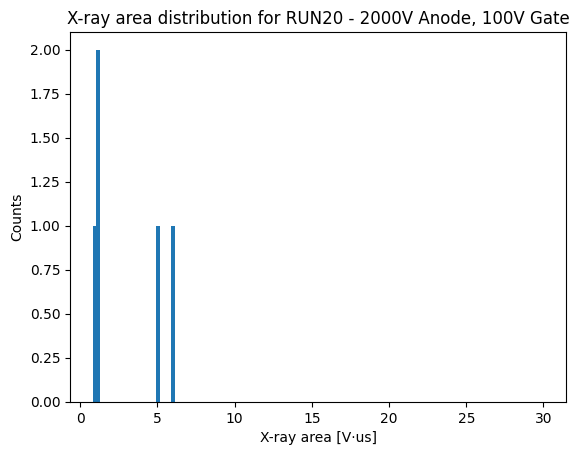

In [94]:
n, bins, patches = plt.hist(xray_data_2['xray_areas'], bins=120, range=(0.8, 30))
plt.gca().set(xlabel='X-ray area [V·us]', ylabel='Counts', title='X-ray area distribution for RUN20 - 2000V Anode, 100V Gate')

In [101]:
tdict2 = {
    "t_s1": -16.379,
    "t_s1_std": 1.549,
    "t_s2_start": 14.094,
    "t_s2_start_std": 1.137,
    "t_s2_end": 19.127,
    "t_s2_end_std": 3.058
}

areas2 = xray_data_2['xray_areas']
uids2 = xray_data_2['uids']
long_uids2 = uids2[areas2 > 0.8]
long_areas2 = areas2[areas2 > 0.8]

len(long_uids2)


10

UID: 7390, Index: 115, Frame: 30, Area: 6.033 V·us
UID: 7765, Index: 121, Frame: 21, Area: 1.242 V·us


/var/folders/tb/zxwsw51n6_g6gs5lnxdv2bcr0000gn/T/ipykernel_21841/1143453653.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


UID: 8791, Index: 137, Frame: 23, Area: 963.481 V·us
UID: 9319, Index: 145, Frame: 39, Area: 1042.832 V·us
UID: 10264, Index: 160, Frame: 24, Area: 5.108 V·us
UID: 11660, Index: 182, Frame: 12, Area: 32.785 V·us
UID: 12372, Index: 193, Frame: 20, Area: 0.895 V·us
UID: 12455, Index: 194, Frame: 39, Area: 77.968 V·us
UID: 12935, Index: 202, Frame: 7, Area: 1.093 V·us
UID: 3410, Index: 53, Frame: 18, Area: 840.674 V·us


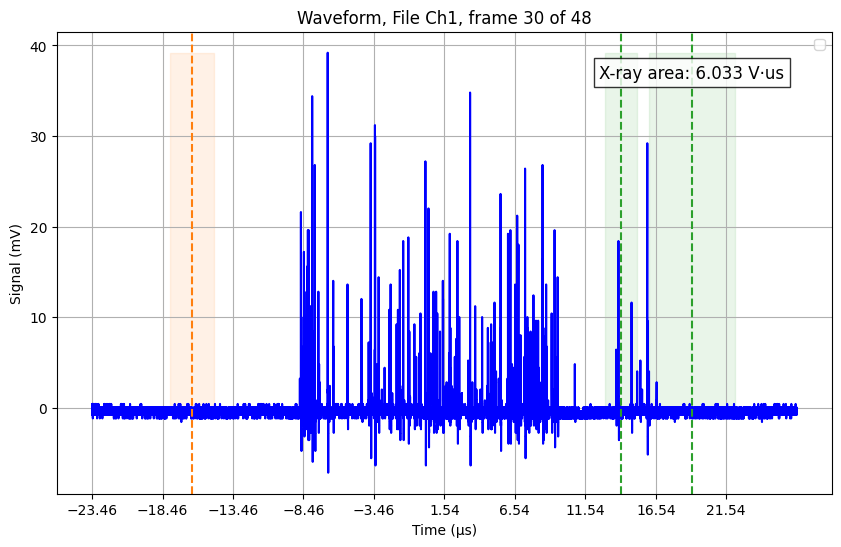

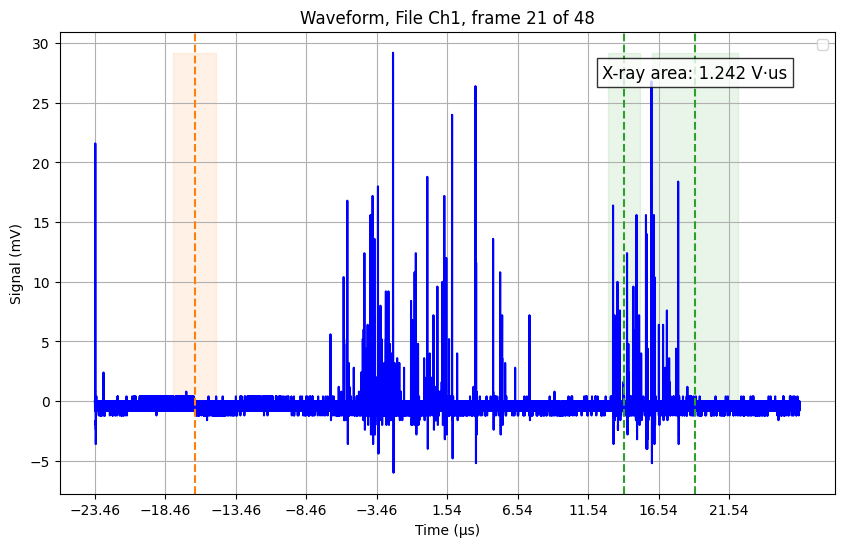

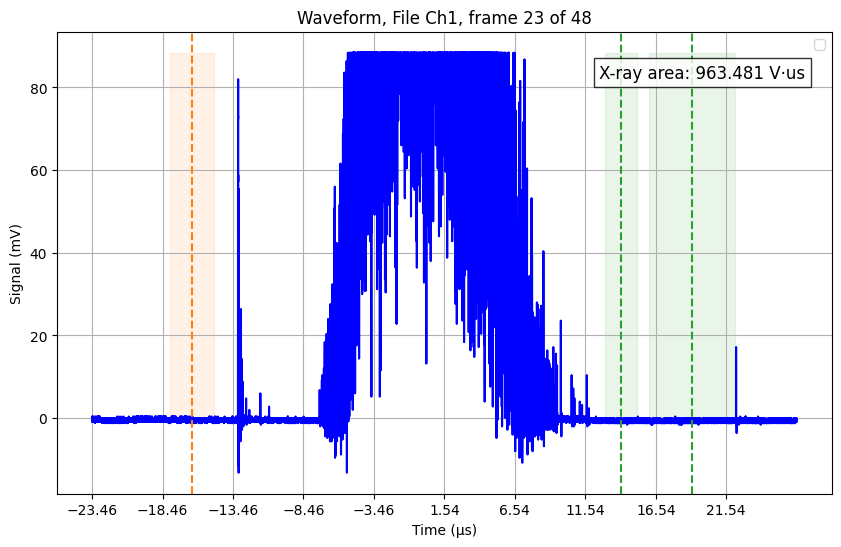

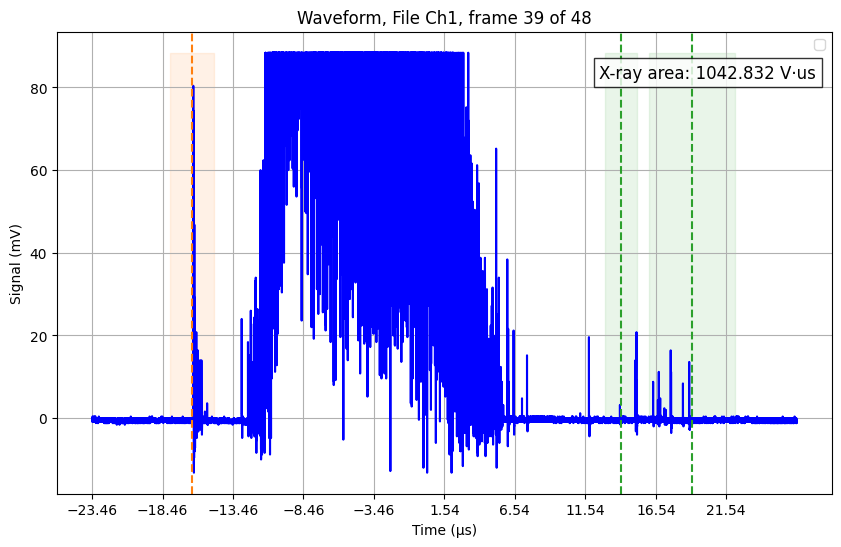

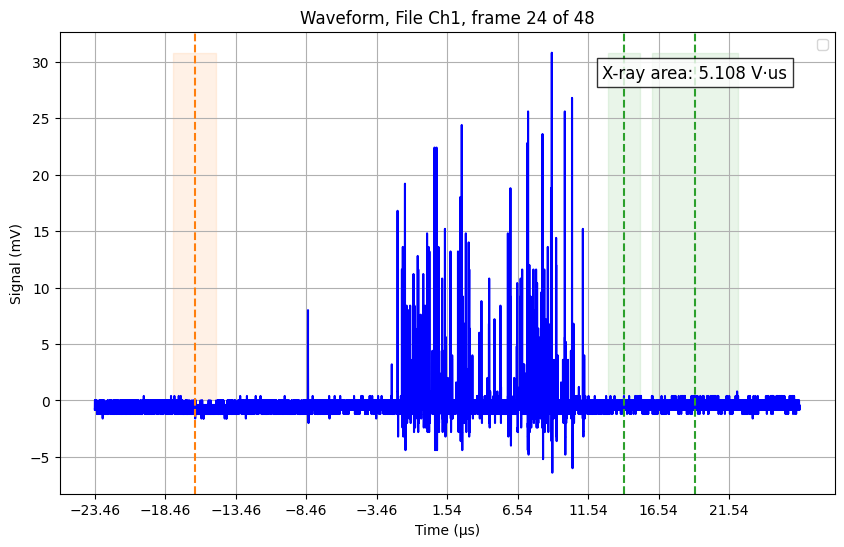

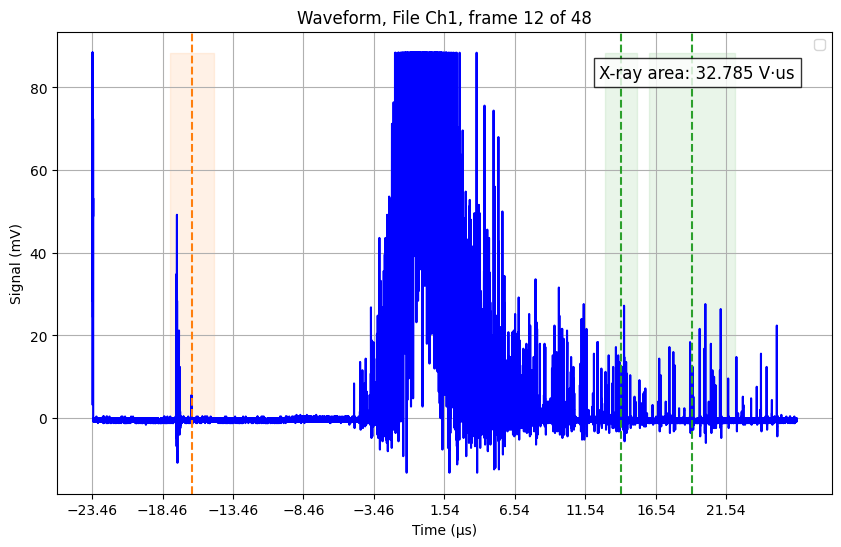

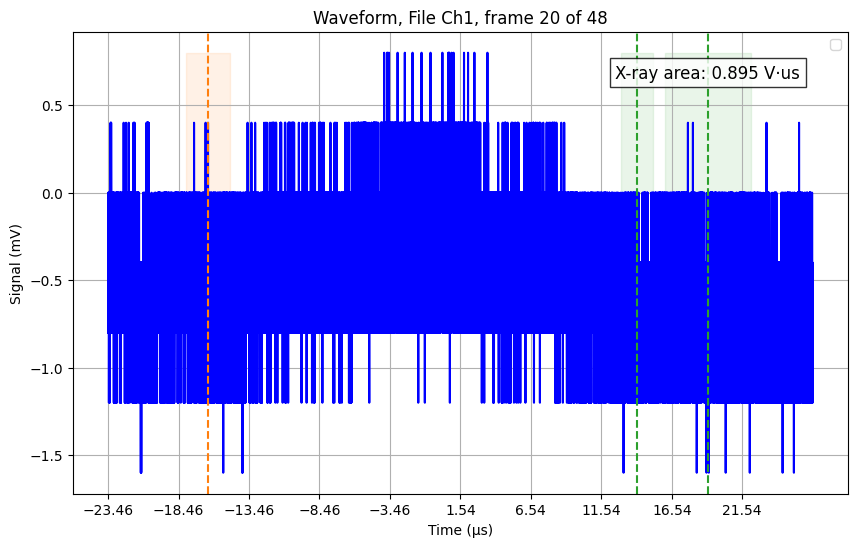

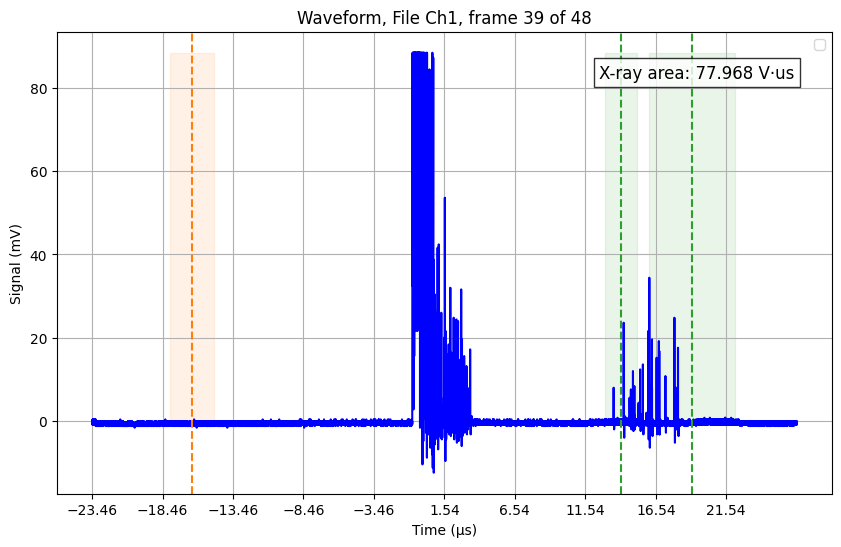

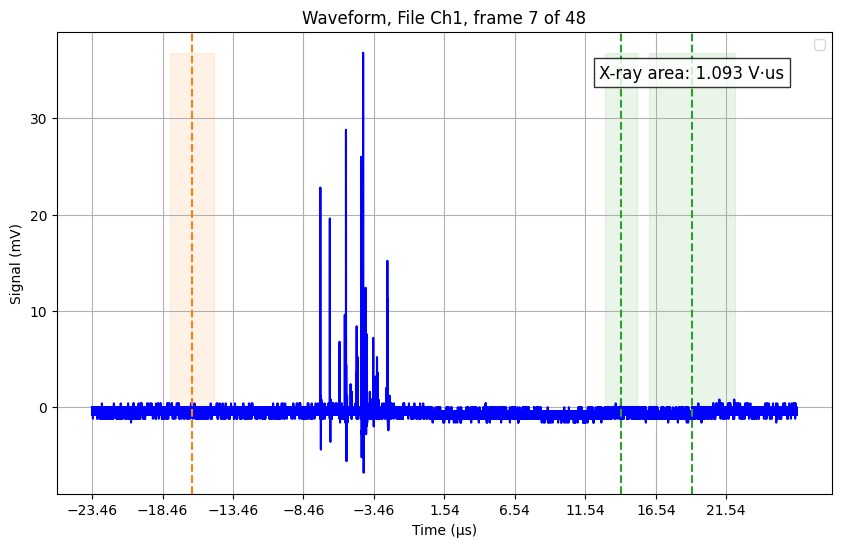

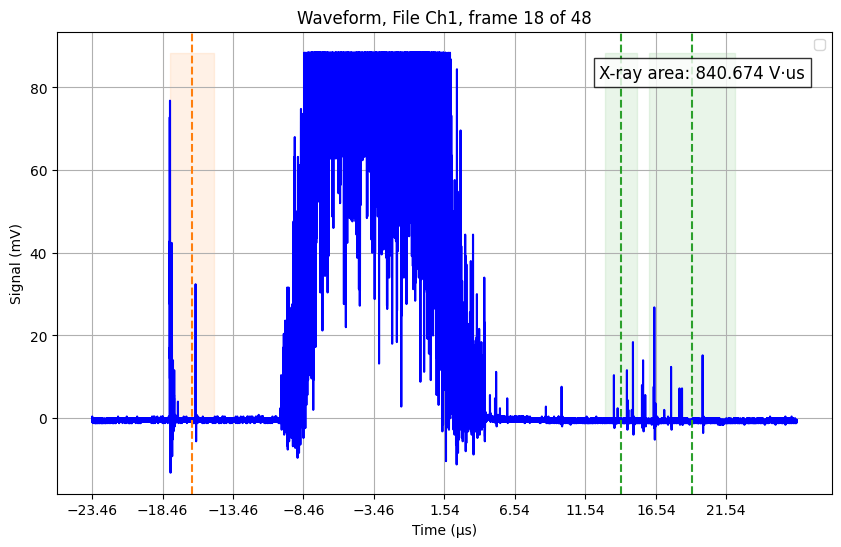

In [102]:
base_path2 = '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN20/FieldScan_trigger2_Gate100_Anode2000/RUN20_20251216_Gate0100_Anode2000_P1_'
max_frames = 10
for uid, area in zip(long_uids2[:max_frames], long_areas2[:max_frames]):
    index, frame = decode_uid(uid)
    print(f"UID: {uid}, Index: {index}, Frame: {frame}, Area: {area:.3f} V·us")
    wfm_path = base_path2 + f'{index}Wfm_Ch1.wfm'
    wfm = load_wfm(wfm_path)
    ax, ymax = plot_waveform(wfm, frame=frame)
    ax.text(0.7, 0.9, f'X-ray area: {area:.3f} V·us', transform=ax.transAxes, fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
    ax.legend()
    _plot_window_shading(ax, tdict2, key='t_s1', y_max=ymax, color='C1')
    _plot_window_shading(ax, tdict2, key='t_s2_start', y_max=ymax, color='C2')
    _plot_window_shading(ax, tdict2, key='t_s2_end', y_max=ymax, color='C2')

# Compare trigger strategies:

In [113]:
pathNand = '/Volumes/KINGSTON/RaTag_data/RUN20/processed_data/all/FieldScan_NAND_50ps_Gate300_Anode2200_xray_areas.npz'
pathNand5ns = '/Volumes/KINGSTON/RaTag_data/RUN20/processed_data/all/FieldScan_NAND_5ns_Gate300_Anode2200_xray_areas.npz'
pathNormal = '/Volumes/KINGSTON/RaTag_data/RUN20/processed_data/all/FieldScan_normal_Gate300_Anode2200_xray_areas.npz'

data1 = np.load(pathNand, allow_pickle=True)
data2 = np.load(pathNand5ns, allow_pickle=True)
data3 = np.load(pathNormal, allow_pickle=True)

Data keys: KeysView(NpzFile '/Volumes/KINGSTON/RaTag_data/RUN20/processed_data/all/FieldScan_NAND_50ps_Gate300_Anode2200_xray_areas.npz' with keys: uids, xray_areas)
1838
Rate of really accepted events for NAND 50ps: 0.0653
Data keys: KeysView(NpzFile '/Volumes/KINGSTON/RaTag_data/RUN20/processed_data/all/FieldScan_NAND_5ns_Gate300_Anode2200_xray_areas.npz' with keys: uids, xray_areas)
13640
Rate of really accepted events for NAND 5ns: 0.0088
Data keys: KeysView(NpzFile '/Volumes/KINGSTON/RaTag_data/RUN20/processed_data/all/FieldScan_normal_Gate300_Anode2200_xray_areas.npz' with keys: uids, xray_areas)
170
Rate of really accepted events for Normal Trigger: 0.7059


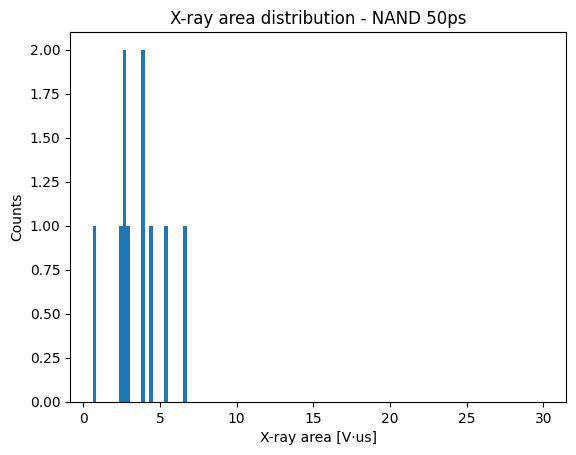

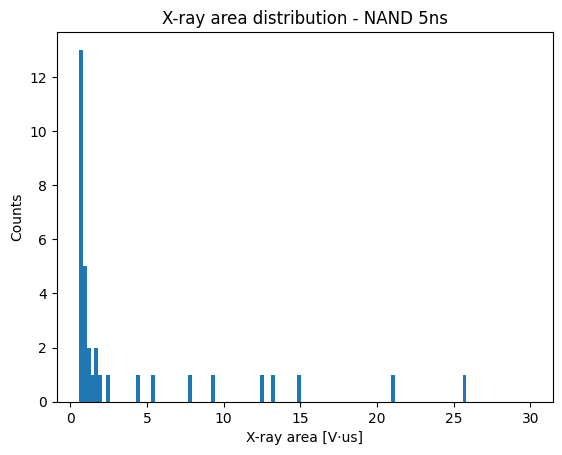

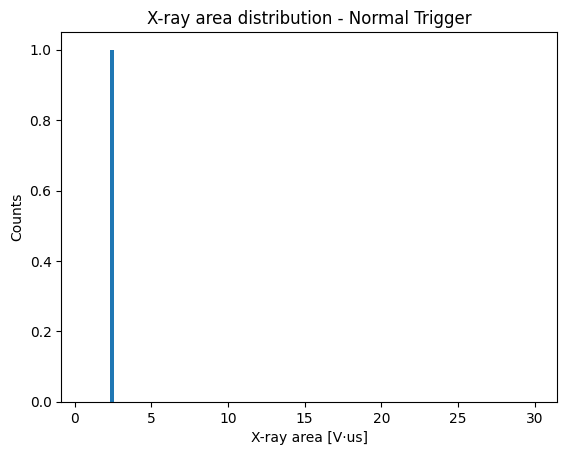

In [124]:
titles = ['NAND 50ps', 'NAND 5ns', 'Normal Trigger']
rate_really_accepted = []
for i, data in enumerate([data1, data2, data3]):
    print(f"Data keys: {data.keys()}")
    print(len(data['xray_areas']))
    plt.figure()
    n, bins, patches = plt.hist(data['xray_areas'], bins=120, range=(0.6, 30))
    plt.gca().set(xlabel='X-ray area [V·us]', ylabel='Counts', title=f'X-ray area distribution - {titles[i]}')
    rra = len(n) / len(data['xray_areas'])
    rate_really_accepted.append(rra)
    print(f"Rate of really accepted events for {titles[i]}: {rra:.4f}")

### Statistics accepted rate:

In [11]:
import json

def get_accepted_rate(json_path):
    with open(json_path, 'r') as f:
        data = f.read()
        parsed = json.loads(data)
        return parsed['n_accepted'] / parsed['n_total'], parsed['drift_field'], parsed['gate']


In [ ]:

json0 = '/Volumes/KINGSTON/RaTag_data/RUN20/processed_data/FieldScan_NAND_50ps_Gate300_Anode2200_metadata.json'
json1 = '/Volumes/KINGSTON/RaTag_data/RUN20/processed_data/FieldScan_NAND_5ns_Gate300_Anode2200_metadata.json'
json2 = '/Volumes/KINGSTON/RaTag_data/RUN20/processed_data/FieldScan_normal_Gate300_Anode2200_metadata.json'

### Statistics accepted rate:
rate0 = get_accepted_rate(json0) * rate_really_accepted[0]
rate1 = get_accepted_rate(json1) * rate_really_accepted[1]
rate2 = get_accepted_rate(json2) * rate_really_accepted[2]
print(f"Accepted rate NAND 50ps: {rate0:.3%}")
print(f"Accepted rate NAND 5ns: {rate1:.3%}")
print(f"Accepted rate Normal Trigger: {rate2:.3%}")

Accepted rate NAND 50ps: 0.357%
Accepted rate NAND 5ns: 0.241%
Accepted rate Normal Trigger: 4.032%


# Find optimal field for X-ray search:

In [17]:
json_path = '/Volumes/KINGSTON/RaTag_data/RUN18/processed_data/*.json'
all_json_files = glob.glob(json_path)
# all_json_files

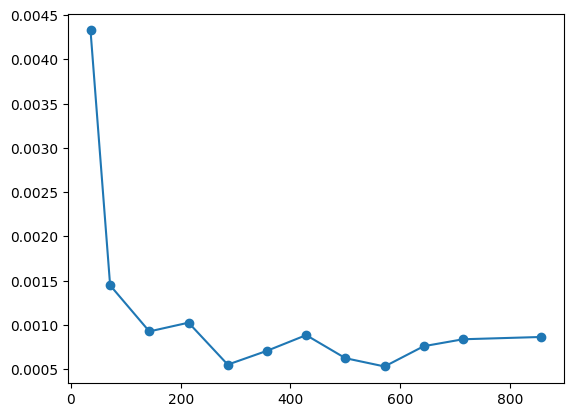

In [14]:
preselect_rate = []
fields = []
for json_file in all_json_files:
    rate, drift_field, gate_voltage = get_accepted_rate(json_file)
    preselect_rate.append(rate)
    fields.append(drift_field)

plt.plot(fields, preselect_rate, 'o-')

## Real rates (area over 0.8 mV us)

In [18]:
path_areas = '/Volumes/KINGSTON/RaTag_data/RUN18/processed_data/all/*_xray_areas.npz'
all_areas_files = glob.glob(path_areas)
# all_areas_files

In [34]:
def calculate_real_rate(f):
    xarea = np.load(f, allow_pickle=True)['xray_areas']
    plt.figure()
    n, bins, patches = plt.hist(xarea, bins=120, range=(0.8, 40))
    plt.gca().set(xlabel='X-ray area [V·us]', ylabel='Counts', title=f'X-ray area distribution for {f.name}')
    accepted_events = xarea[(xarea > 0.8) & (xarea < 40)]
    selected_rate = len(accepted_events) / len(xarea)
    total_events = len(accepted_events)
    return selected_rate, total_events

Real accepted rate for FieldScan_Gate0050_Anode1950_xray_areas.npz: 15.3359%
Total accepted rate for FieldScan_Gate0050_Anode1950_xray_areas.npz: 0.0663%
Real accepted rate for FieldScan_Gate0100_Anode2000_xray_areas.npz: 49.6403%
Total accepted rate for FieldScan_Gate0100_Anode2000_xray_areas.npz: 0.0719%
Real accepted rate for FieldScan_Gate0200_Anode2100_xray_areas.npz: 48.8764%
Total accepted rate for FieldScan_Gate0200_Anode2100_xray_areas.npz: 0.0453%
Real accepted rate for FieldScan_Gate0300_Anode2200_xray_areas.npz: 62.4365%
Total accepted rate for FieldScan_Gate0300_Anode2200_xray_areas.npz: 0.0641%
Real accepted rate for FieldScan_Gate0400_Anode2300_xray_areas.npz: 59.4340%
Total accepted rate for FieldScan_Gate0400_Anode2300_xray_areas.npz: 0.0328%
Real accepted rate for FieldScan_Gate0500_Anode2400_xray_areas.npz: 60.2941%
Total accepted rate for FieldScan_Gate0500_Anode2400_xray_areas.npz: 0.0427%
Real accepted rate for FieldScan_Gate0600_Anode2500_xray_areas.npz: 70.5882%

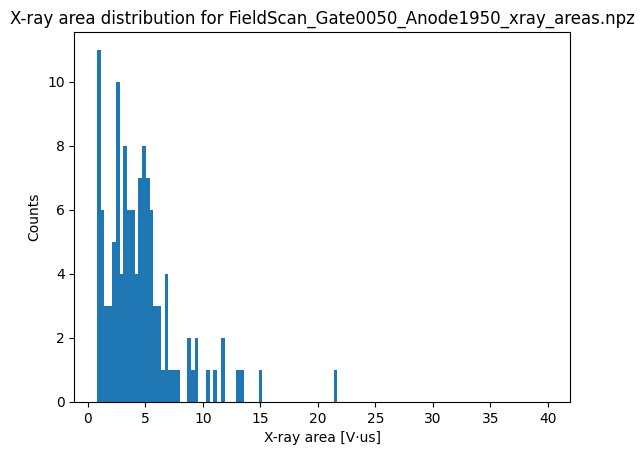

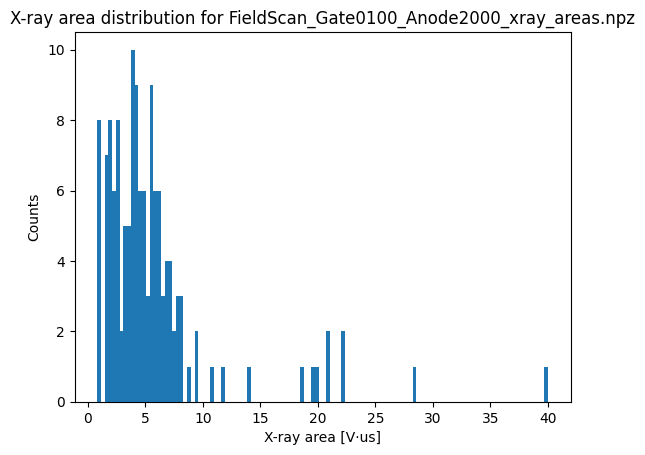

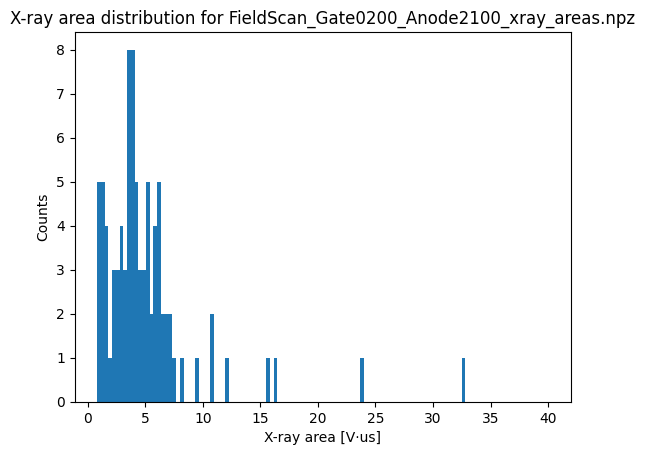

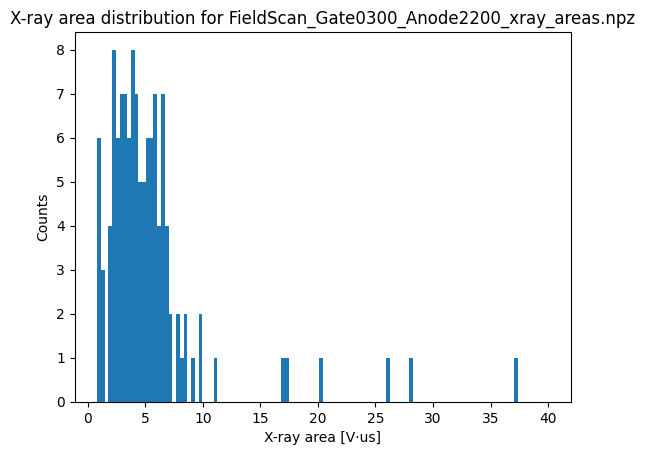

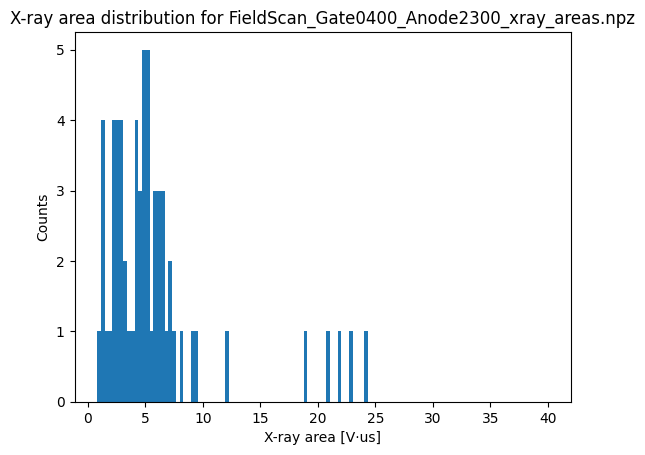

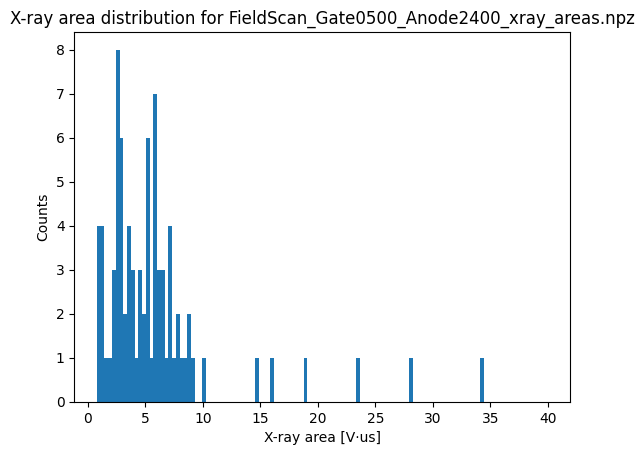

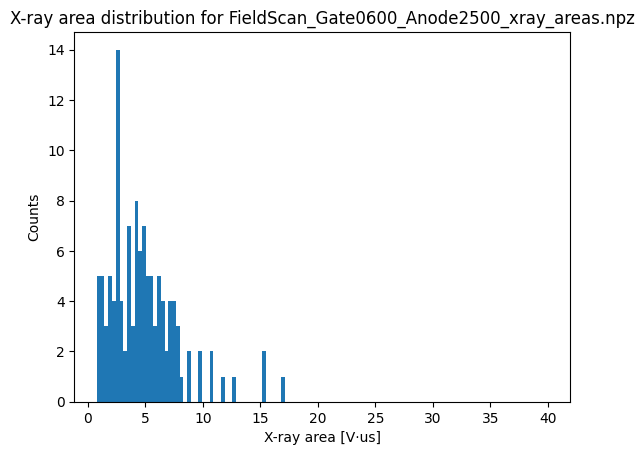

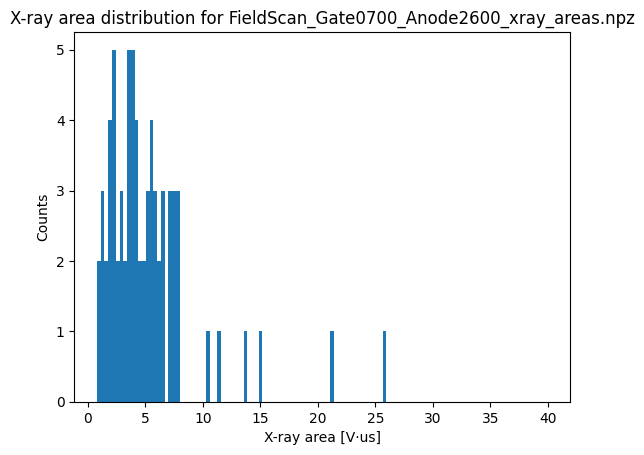

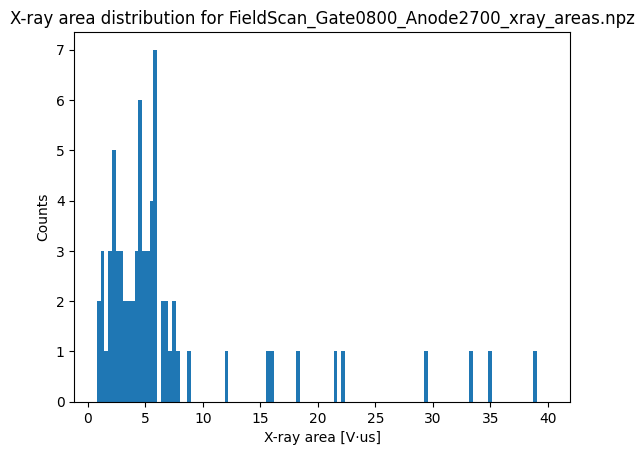

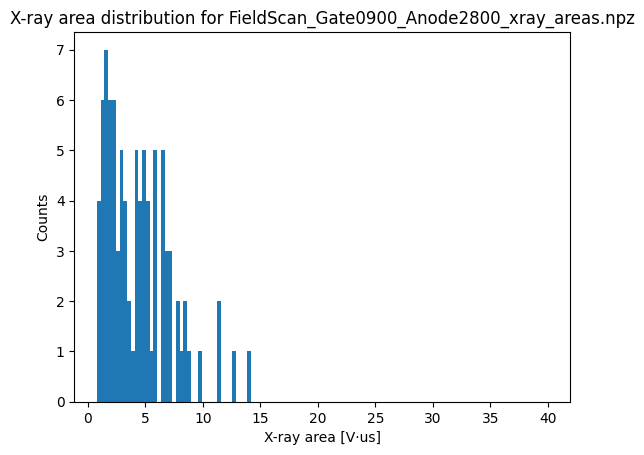

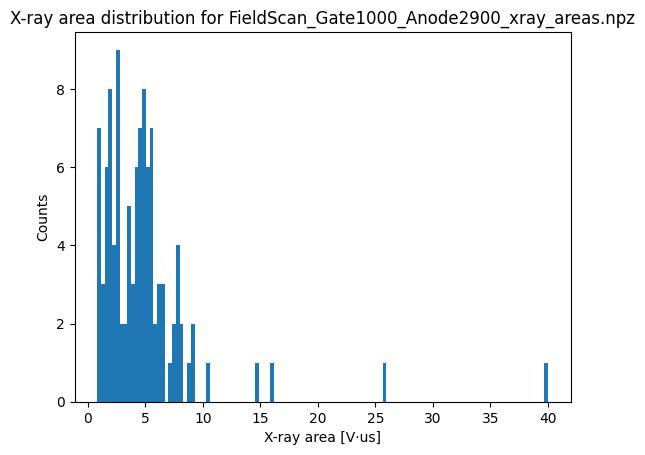

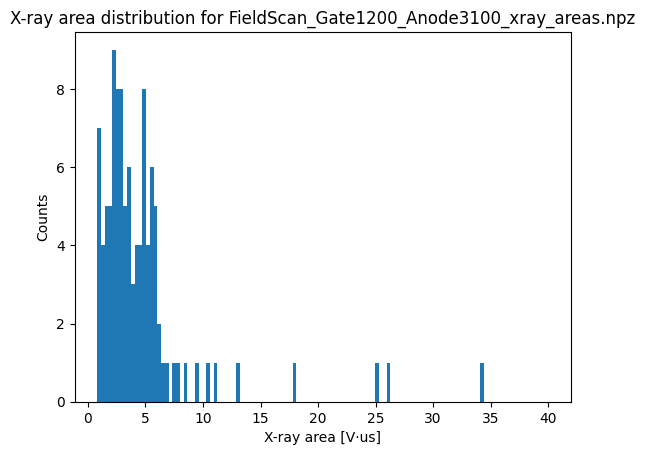

In [35]:
real_rates = []
total_rates = []
total_events = []
for r, f in zip(preselect_rate, all_areas_files):
    f = Path(f)
    rate, events = calculate_real_rate(f)
    print(f"Real accepted rate for {f.name}: {rate:.4%}")
    print(f"Total accepted rate for {f.name}: {r * rate:.4%}")
    real_rates.append(rate)
    total_rates.append(r * rate)
    total_events.append(events)

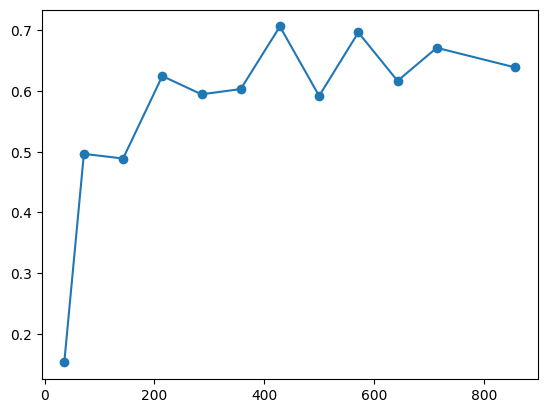

In [41]:
# plt.plot(fields, total_rates, 'o-')
plt.plot(fields, real_rates, 'o-')
# plt.plot(fields, total_events, 'o-')

# Run 21 (x-ray dedicated)

In [102]:
path_areas = '/Volumes/KINGSTON/RaTag_data/RUN21_xrays/processed_data/all/*_xray_areas.npz'
xray_21_files = glob.glob(path_areas)
xray_21_files

['/Volumes/KINGSTON/RaTag_data/RUN21_xrays/processed_data/all/FieldScan_Gate100_Anode2000_batch1_xray_areas.npz',
 '/Volumes/KINGSTON/RaTag_data/RUN21_xrays/processed_data/all/FieldScan_Gate100_Anode2000_batch2_xray_areas.npz',
 '/Volumes/KINGSTON/RaTag_data/RUN21_xrays/processed_data/all/FieldScan_Gate100_Anode2000_batch3_xray_areas.npz',
 '/Volumes/KINGSTON/RaTag_data/RUN21_xrays/processed_data/all/FieldScan_Gate100_Anode2000_batch4_xray_areas.npz',
 '/Volumes/KINGSTON/RaTag_data/RUN21_xrays/processed_data/all/FieldScan_Gate100_Anode2000_batch5_xray_areas.npz',
 '/Volumes/KINGSTON/RaTag_data/RUN21_xrays/processed_data/all/FieldScan_Gate100_Anode2000_batch6_xray_areas.npz']

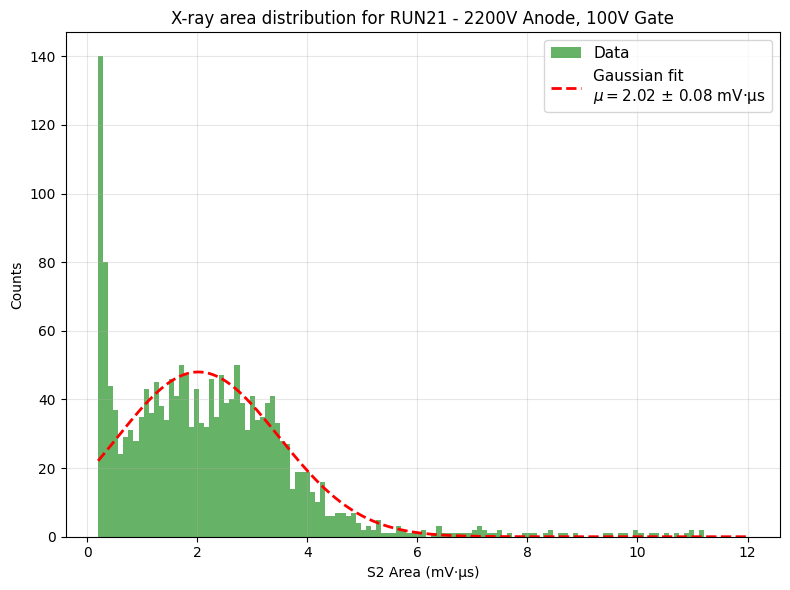

In [106]:
xarea = np.load(xray_21_files[2], allow_pickle=True)['xray_areas']

mask = xarea > 0.43
xarea_masked = xarea[mask]
# n, bins, patches = plt.hist(xarea_masked, bins=150, range=(0, 20))

mean, sigma, ci95, cb, cc, fitres = fit_gaussian_to_histogram(xarea, nbins=120, bin_cuts=(0., 12), exclude_index=5)
plot_gaussian_fit(data=xarea, bin_cuts=(0.2, 12), nbins=120, fit_result=fitres,
                title='X-ray area distribution for RUN21 - 2200V Anode, 100V Gate',
                xlabel='S2 Area (mV·µs)', color='green');
# plt.gca().set(xlabel='X-ray area [V·us]', ylabel='Counts', title='X-ray area distribution for RUN21 - 2200V Anode, 100V Gate')

In [104]:
sum(n)

np.float64(259.0)

[(0.0, 400.0)]

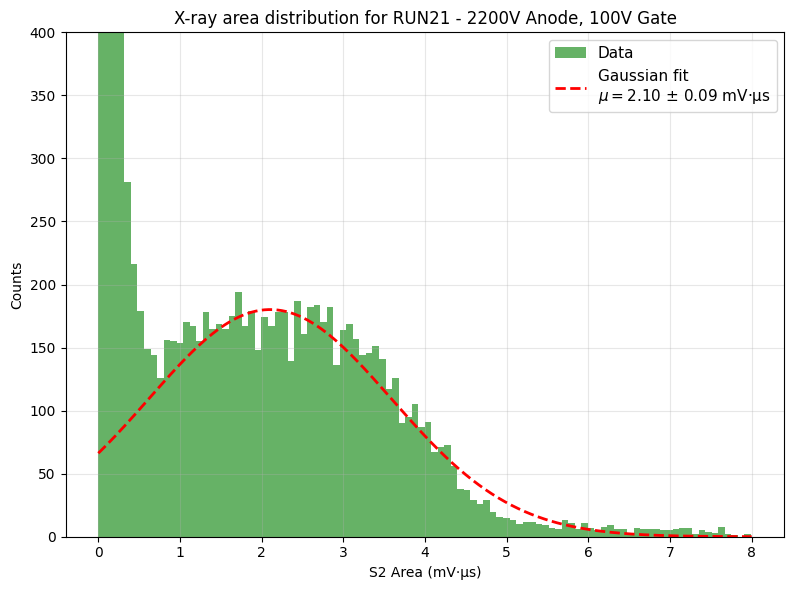

In [125]:
path_areas = '/Volumes/KINGSTON/RaTag_data/RUN21_xrays/processed_data/RUN_X_xray_areas_combined.npz'
xray_21_file = glob.glob(path_areas)
xac = np.load(xray_21_file[0], allow_pickle=True)['xray_areas']
xacmean, sigma, ci95, cb, cc, fitres = fit_gaussian_to_histogram(xac, nbins=100, bin_cuts=(0.2, 8), exclude_index=10)
plot_gaussian_fit(data=xac, bin_cuts=(0.0, 8), nbins=100, fit_result=fitres,
                title='X-ray area distribution for RUN21 - 2200V Anode, 100V Gate',
                xlabel='S2 Area (mV·µs)', color='green');
plt.gca().set(ylim=(0, 400))
# plt.gca().set(xlabel='X-ray area [V·us]', ylabel='Counts', title='X-ray area distribution for RUN21 - 2200V Anode, 100V Gate')